In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
prolongations = pd.read_csv('prolongations.csv')
financial_data = pd.read_csv('financial_data.csv')

In [4]:
prolongations.head()

,id,month,AM
0,42,ноябрь 2022,Васильев Артем Александрович
1,453,ноябрь 2022,Васильев Артем Александрович
2,548,ноябрь 2022,Михайлов Андрей Сергеевич
3,87,ноябрь 2022,Соколова Анастасия Викторовна
4,429,ноябрь 2022,Соколова Анастасия Викторовна


In [5]:
financial_data.head()

,id,Причина дубля,Ноябрь 2022,Декабрь 2022,Январь 2023,Февраль 2023,Март 2023,Апрель 2023,Май 2023,Июнь 2023,Июль 2023,Август 2023,Сентябрь 2023,Октябрь 2023,Ноябрь 2023,Декабрь 2023,Январь 2024,Февраль 2024,Account
0,42,NaN,"36 220,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Васильев Артем Александрович
1,657,первая часть оплаты,стоп,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Васильев Артем Александрович
2,657,вторая часть оплаты,стоп,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Васильев Артем Александрович
3,594,NaN,стоп,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Васильев Артем Александрович
4,665,NaN,"10 000,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Васильев Артем Александрович


In [6]:
month_columns = [col for col in financial_data.columns if any(month in col for month in [
    'Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь',
    'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'
])]

In [7]:
month_columns

['Ноябрь 2022',
 'Декабрь 2022',
 'Январь 2023',
 'Февраль 2023',
 'Март 2023',
 'Апрель 2023',
 'Май 2023',
 'Июнь 2023',
 'Июль 2023',
 'Август 2023',
 'Сентябрь 2023',
 'Октябрь 2023',
 'Ноябрь 2023',
 'Декабрь 2023',
 'Январь 2024',
 'Февраль 2024']

In [8]:
def clean_numeric(value):
    if isinstance(value, str):
        # Удаляем все пробелы (включая неразрывные) и заменяем запятые на точки
        value = value.replace('\xa0', '').replace(' ', '').replace(',', '.')
        # Обрабатываем текстовые маркеры
        if value.lower() in ['стоп', 'вноль', 'вноль', 'end']:
            return np.nan
    return value

In [9]:
for col in month_columns:
    financial_data[col] = (
        financial_data[col]
        .apply(clean_numeric)
        .astype(float)
    )

In [10]:
financial_data_clean = financial_data.groupby(['id', 'Account'])[month_columns].sum().reset_index()
financial_data_clean = financial_data_clean.melt(
    id_vars=['id', 'Account'],
    value_vars=month_columns,
    var_name='month',
    value_name='revenue'
)
financial_data_clean.rename(columns={'Account': 'AM'}, inplace=True)

In [11]:
financial_data_clean

,id,AM,month,revenue
0,15,Иванова Мария Сергеевна,Ноябрь 2022,439280.0
1,16,Иванова Мария Сергеевна,Ноябрь 2022,0.0
2,31,Васильев Артем Александрович,Ноябрь 2022,55100.0
3,39,Попова Екатерина Николаевна,Ноябрь 2022,137700.0
4,42,Васильев Артем Александрович,Ноябрь 2022,36220.0
...,...,...,...,...
5019,1001,Кузнецов Михаил Иванович,Февраль 2024,0.0
5020,1004,без А/М,Февраль 2024,0.0
5021,1006,Смирнова Ольга Владимировна,Февраль 2024,0.0
5022,1012,Петрова Анна Дмитриевна,Февраль 2024,0.0


In [12]:
merged = pd.merge(
    prolongations,
    financial_data_clean,
    on=['id', 'AM'],
    how='left'
)

In [13]:
def standardize_month_format(month_str):
    months_map = {
        'январь': 'Январь', 'февраль': 'Февраль', 'март': 'Март', 'апрель': 'Апрель',
        'май': 'Май', 'июнь': 'Июнь', 'июль': 'Июль', 'август': 'Август',
        'сентябрь': 'Сентябрь', 'октябрь': 'Октябрь', 'ноябрь': 'Ноябрь', 'декабрь': 'Декабрь'
    }
    if isinstance(month_str, str):
        parts = month_str.strip().lower().split()
        if len(parts) == 2 and parts[0] in months_map:
            return f"{months_map[parts[0]]} {parts[1]}"
    return month_str 

In [14]:
merged['month_x'] = merged['month_x'].apply(standardize_month_format)
merged['month_y'] = merged['month_y'].apply(standardize_month_format)

In [15]:
merged

,id,month_x,AM,month_y,revenue
0,42,Ноябрь 2022,Васильев Артем Александрович,Ноябрь 2022,36220.0
1,42,Ноябрь 2022,Васильев Артем Александрович,Декабрь 2022,0.0
2,42,Ноябрь 2022,Васильев Артем Александрович,Январь 2023,0.0
3,42,Ноябрь 2022,Васильев Артем Александрович,Февраль 2023,0.0
4,42,Ноябрь 2022,Васильев Артем Александрович,Март 2023,0.0
...,...,...,...,...,...
6877,913,Декабрь 2023,Смирнова Ольга Владимировна,Октябрь 2023,58200.0
6878,913,Декабрь 2023,Смирнова Ольга Владимировна,Ноябрь 2023,58200.0
6879,913,Декабрь 2023,Смирнова Ольга Владимировна,Декабрь 2023,58200.0
6880,913,Декабрь 2023,Смирнова Ольга Владимировна,Январь 2024,0.0


In [16]:
merged['end_month'] = merged['month_x']

In [17]:
merged

,id,month_x,AM,month_y,revenue,end_month
0,42,Ноябрь 2022,Васильев Артем Александрович,Ноябрь 2022,36220.0,Ноябрь 2022
1,42,Ноябрь 2022,Васильев Артем Александрович,Декабрь 2022,0.0,Ноябрь 2022
2,42,Ноябрь 2022,Васильев Артем Александрович,Январь 2023,0.0,Ноябрь 2022
3,42,Ноябрь 2022,Васильев Артем Александрович,Февраль 2023,0.0,Ноябрь 2022
4,42,Ноябрь 2022,Васильев Артем Александрович,Март 2023,0.0,Ноябрь 2022
...,...,...,...,...,...,...
6877,913,Декабрь 2023,Смирнова Ольга Владимировна,Октябрь 2023,58200.0,Декабрь 2023
6878,913,Декабрь 2023,Смирнова Ольга Владимировна,Ноябрь 2023,58200.0,Декабрь 2023
6879,913,Декабрь 2023,Смирнова Ольга Владимировна,Декабрь 2023,58200.0,Декабрь 2023
6880,913,Декабрь 2023,Смирнова Ольга Владимировна,Январь 2024,0.0,Декабрь 2023


In [18]:
def extract_year_month(s):
    parts = s.split()
    return f"{parts[0]} {parts[1]}"

# Создаем словарь для порядка месяцев
months_order = [
    'Январь 2023', 'Февраль 2023', 'Март 2023', 'Апрель 2023', 'Май 2023', 'Июнь 2023',
    'Июль 2023', 'Август 2023', 'Сентябрь 2023', 'Октябрь 2023', 'Ноябрь 2023', 'Декабрь 2023'
]

In [19]:
def calculate_prolongation(df):
    metrics = []
    for end_month in months_order:
        # Фильтруем проекты, завершившиеся в текущем месяце
        projects = df[df['end_month'] == end_month]

        # Сумма отгрузки в последний месяц
        total_last_month = projects[projects['month_y'] == end_month]['revenue'].sum()

        # Коэффициент K1 (пролонгация в первый месяц)
        next_month_1 = months_order[(months_order.index(end_month) + 1)] if end_month != 'Декабрь 2023' else None
        if next_month_1:
            k1 = projects[projects['month_y'] == next_month_1]['revenue'].sum() / total_last_month if total_last_month > 0 else 0
        else:
            k1 = 0

        # Коэффициент K2 (пролонгация во второй месяц)
        next_month_2 = months_order[(months_order.index(end_month) + 2)] if end_month not in ['Ноябрь 2023', 'Декабрь 2023'] else None
        if next_month_2 and total_last_month > 0:
            remaining = total_last_month - projects[projects['month_y'] == next_month_1]['revenue'].sum()
            k2 = projects[projects['month_y'] == next_month_2]['revenue'].sum() / remaining if remaining > 0 else 0
        else:
            k2 = 0

        metrics.append({
            'end_month': end_month,
            'K1': round(k1, 2),
            'K2': round(k2, 2)
        })
    return pd.DataFrame(metrics)

In [20]:
managers_report = merged.groupby('AM').apply(calculate_prolongation).reset_index().drop(columns='level_1')

/var/folders/28/ry94lb9x7g9dlmnxp72zr5rr0000gn/T/ipykernel_9359/2415082777.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  managers_report = merged.groupby('AM').apply(calculate_prolongation).reset_index().drop(columns='level_1')


In [21]:
managers_report

,AM,end_month,K1,K2
0,Васильев Артем Александрович,Январь 2023,1.21,0.00
1,Васильев Артем Александрович,Февраль 2023,0.50,1.12
2,Васильев Артем Александрович,Март 2023,0.34,0.40
3,Васильев Артем Александрович,Апрель 2023,0.51,1.23
4,Васильев Артем Александрович,Май 2023,0.00,0.00
...,...,...,...,...
115,без А/М,Август 2023,0.00,0.00
116,без А/М,Сентябрь 2023,0.00,0.00
117,без А/М,Октябрь 2023,0.00,0.00
118,без А/М,Ноябрь 2023,0.00,0.00


In [22]:
def standardize_month_format(month_str):
    months_map = {
        'январь': 'Январь', 'февраль': 'Февраль', 'март': 'Март', 'апрель': 'Апрель',
        'май': 'Май', 'июнь': 'Июнь', 'июль': 'Июль', 'август': 'Август',
        'сентябрь': 'Сентябрь', 'октябрь': 'Октябрь', 'ноябрь': 'Ноябрь', 'декабрь': 'Декабрь'
    }
    if isinstance(month_str, str):
        parts = month_str.strip().lower().split()  # Приведение к нижнему регистру и удаление лишних пробелов
        if len(parts) == 2 and parts[0] in months_map:
            return f"{months_map[parts[0]]} {parts[1]}"  # Приведение к стандартному формату "Месяц Год"
    return month_str 

In [ ]:
merged['month_x'] = merged['month_x'].apply(standardize_month_format)
merged['month_y'] = merged['month_y'].apply(standardize_month_format)

# 2. Расчет коэффициентов пролонгации
def calculate_prolongation_fixed(df):
    results = []
    months_order = [
        'Январь 2023', 'Февраль 2023', 'Март 2023', 'Апрель 2023', 'Май 2023', 'Июнь 2023',
        'Июль 2023', 'Август 2023', 'Сентябрь 2023', 'Октябрь 2023', 'Ноябрь 2023', 'Декабрь 2023'
    ]

    for i in range(len(months_order) - 2):  # Исключаем последние 2 месяца
        end_month = months_order[i]
        first_month = months_order[i + 1]
        second_month = months_order[i + 2]

        # Фильтруем проекты, завершившиеся в текущем месяце
        projects = df[df['month_x'] == end_month]

        # Сумма отгрузки в последний месяц
        total_last_month = projects[projects['month_y'] == end_month]['revenue'].sum()

        # Сумма отгрузки в первый месяц пролонгации
        total_first_month = projects[projects['month_y'] == first_month]['revenue'].sum()
        k1 = total_first_month / total_last_month if total_last_month > 0 else np.nan

        # Сумма отгрузки проектов, завершившихся два месяца назад, не пролонгированных в первый месяц
        prev_month_projects = df[(df['month_x'] == months_order[i - 1]) & ~df['id'].isin(projects['id'])]
        total_prev_month = prev_month_projects['revenue'].sum()

        # Сумма отгрузки во второй месяц пролонгации
        total_second_month = prev_month_projects[prev_month_projects['month_y'] == second_month]['revenue'].sum()
        k2 = total_second_month / total_prev_month if total_prev_month > 0 else np.nan

        results.append({
            'end_month': end_month,
            'first_month': first_month,
            'second_month': second_month,
            'total_last_month': total_last_month,
            'total_first_month': total_first_month,
            'K1': k1,
            'total_prev_month': total_prev_month,
            'total_second_month': total_second_month,
            'K2': k2
        })

    return pd.DataFrame(results)

fixed_report = calculate_prolongation_fixed(merged)

fixed_report

,end_month,first_month,second_month,total_last_month,total_first_month,K1,total_prev_month,total_second_month,K2
0,Январь 2023,Февраль 2023,Март 2023,2198830.50,1741285.00,0.791914,71279935.46,4264207.53,0.059823
1,Февраль 2023,Март 2023,Апрель 2023,1608616.75,914520.75,0.568514,12965507.00,832510.00,0.064210
2,Март 2023,Апрель 2023,Май 2023,2902680.55,1216123.00,0.418965,13042952.00,1160769.00,0.088996
3,Апрель 2023,Май 2023,Июнь 2023,3222123.00,1846215.75,0.572981,14829514.48,513855.00,0.034651
4,Май 2023,Июнь 2023,Июль 2023,1115025.53,181135.00,0.162449,26493688.79,1213683.50,0.045810
5,Июнь 2023,Июль 2023,Август 2023,2295704.85,993100.00,0.432590,6762193.14,254730.00,0.037670
6,Июль 2023,Август 2023,Сентябрь 2023,1686225.83,676818.88,0.401381,13881559.85,424480.00,0.030579
7,Август 2023,Сентябрь 2023,Октябрь 2023,3058122.76,894590.42,0.292529,7057436.71,333251.25,0.047220
8,Сентябрь 2023,Октябрь 2023,Ноябрь 2023,3520530.81,2847965.19,0.808959,18796398.48,929154.00,0.049433
9,Октябрь 2023,Ноябрь 2023,Декабрь 2023,1567139.97,811594.00,0.517882,39215651.03,2822607.28,0.071977


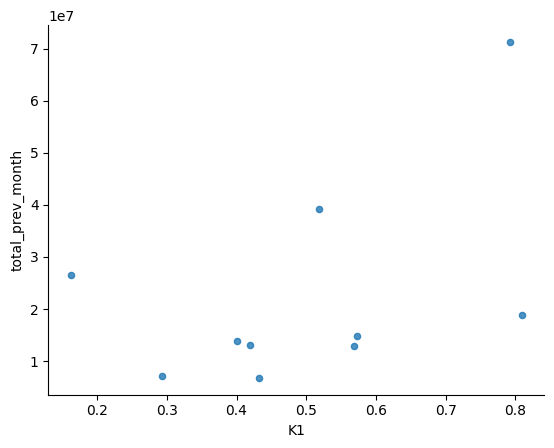

In [28]:
fixed_report.plot(kind='scatter', x='K1', y='total_prev_month', s=20, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

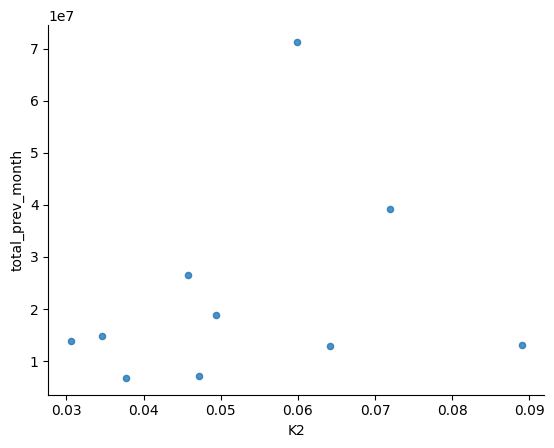

In [29]:
fixed_report.plot(kind='scatter', x='K2', y='total_prev_month', s=20, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [30]:
fixed_report = calculate_prolongation_fixed(merged)

# сохранение в Excel файл
fixed_report.to_excel('fixed_report.xlsx', index=False)